# レッスン の概要

GIS で Python を利用することを学習する際には、手動のワークフローと Python コードを使用したワークフローを比較することが役に立ちます。このレッスンでは、ArcGIS Online および ArcGIS Notebook でPython を使用して、一般的な Web マッピングと解析のワークフローを完成させます。ArcGIS Online でコンテンツを検索し、Web マップに追加して、データに対して空間分析を実行します。このノートブックを開き、指示に従っていくことで、ArcGIS Notebooks を使用した Web GIS についてより深く理解することができます。

このレッスンを通して、次のような方法を学びます。
* [ArcGIS Online でマップを作成](#create-a-map-agol)
* [ArcGIS Notebooks でマップを作成](#create-a-map-arcgis-nb)
* [ArcGIS Online で解析を実行 - ブロック グループで集約](#perform-analysis-agol)
* [ArcGIS Online で解析を実行 - 六角形で集約](#perform-analysis-agol-hexagons)
* [ArcGIS Notebooks で解析を実行 - ブロック グループで集約](#perform-analysis-block-group)
* [ArcGIS Notebooks で解析を実行 - 六角形で集約](#perform-analysis-hexbins)
* [チャレンジ](#challenge)

# ArcGIS Online でマップを作成 <a class="anchor" id="create-a-map-agol"></a>

このセクションでは、ArcGIS Online でマップを作成します。ArcGIS Online や Web マップの作成が初めての方は、このレッスンを始める前に、Learn ArcGIS の[creating a web map](https://learn.arcgis.com/en/paths/map-in-a-minute/) ([1 分以内でマップを作成](https://learn.arcgis.com/ja/paths/map-in-a-minute/) )と [sharing a web map](https://learn.arcgis.com/en/projects/share-a-map/) ([マップの共有](https://learn.arcgis.com/ja/projects/share-a-map/) )のレッスンを確認してください。
また、このレッスンを始める前に、[Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) のレッスンを修了しておくことをお勧めします。
このノートブックと ArcGIS Online の Web マップの 2 つのブラウザ タブで手順を実行します。

## マップを作成

1.	まず、別のタブを開いて、ArcGIS Online の組織または Learn ArcGIS にサインインします。

2.	リボン上の **Map (マップ)** をクリックして、新しいマップを作成します。
このレッスンでは Map Viewer Classic を利用します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/7aa7090238f649c7903bd1db7f01f77c/data" width="600px" />

## レイヤーの追加

次に、マップにコンテンツを追加します。コンテンツは、フォルダー、組織、ArcGIS Living Atlas、または ArcGIS Online から追加することができます。

3.	リボン上で、**Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/c6463fdc94c74f23aad37e4eb28c89be/data" width="240px" />

4. ドロップダウン メニューから、**Search for Layers (レイヤーの検索)** をクリックします。

5. **My Content (マイ コンテンツ)** をクリックし、**ArcGIS Online** をクリックします。


6. 検索窓に *Pasadena Block Groups* と入力します。

6. **Learn_ArcGIS** が所有する結果をクリックし、**Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/c8d6e44259a6454ba6e5788550fd60ed/data" width="300px" />

7. 次に、*Pasadena Traffic Collisions* を検索し、**Learn_ArcGIS** が所有する **Traffic Collision** アイテムをマップに追加します。

8. Web マップ を保存します。*Pasadena_Traffic_* の後ろにあなたのイニシャルを付けてください。

あなたのマップには、カリフォルニア州パサデナのブロック グループ（block groups）と交通事故（traffic collisions）の 2つのレイヤーが含まれています。交通事故 レイヤーの各赤い点は、2008年から2018年の間に発生した自動車が関与する交通事故 1件を表しています。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/154062acf1dc4e1b9eff08077cd7c709/data" width="600px" />

# ArcGIS Notebooks でマップを作成 <a class="anchor" id="create-a-map-arcgis-nb"></a>

手動でWeb マップ を作成したので、次はArcGIS API for Python を使用して同じレイヤーを持つ Web マップ を作成して保存します。まず、空のノートブックを作成し、Python を使用して Web マップを作成します。その後、Web マップに追加したレイヤーを使って解析を行います。

## ノートブックを作成

1. 先ほど作成したWeb マップから、マップのタイトルの横にある **Home (ホーム)** をクリックし、**Notebook (ノートブック)** をクリックします。


2.  **New Notebook (新しいノートブック)** をクリックし、その後 **Standard** をクリックします。

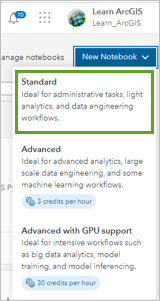


3. コードを実行する前に、ノートブックに名前を付けて保存してください。リボン上で、**Save (保存)** をクリックし、**Save As (名前を付けて保存)** を選択します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/31a7af89eda44341bd387a16ae5fb93d/data" width="200px" />


4. **タイトル** に *Pasadena Collisions Aggregated Notebook* と入力後、自分のイニシャルを入力します。**タグ** に *traffic collisions* と入力し、**Save Notebook (ノートブックの保存)** をクリックします。

ノートブックの準備ができたので、マークダウンのセルを作成し、分析の情報を提供するヘッダーと説明をセルに追加します。マークダウンの構文では、ヘッダーはシャープ記号（#）で表示されます。

5. ノートブック下部のコード セルをクリックし、ツールバーの **Code** ドロップダウン メニューをクリックし、**Markdown** をクリックします。

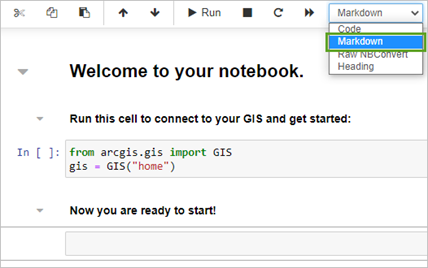


6. 新しいMarkdown セルに、以下をコピー＆ペーストするか、入力します。  

\#\# Aggregate data using ArcGIS Notebooks  

In this notebook, I will aggregate point features by Pasadena block groups and by hexagons.  
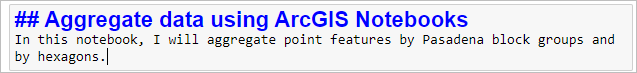  


7. *Shift+Enter* キーを押すか、リボン上のRun ボタンをクリックして、セルを実行します。セルは、以下のように書式付きテキストとして表示されます。  

Markdown セルを実行すると、セル内のテキストがフォーマットされます。 
Code セルを実行すると、そのセル内のコードが実行されます。 

<!--## ArcGIS Notebooks を使ってデータを集約 
In this notebook, I will aggregate point features by Pasadena block groups and by hexagons.-->

ここで、GIS モジュールを呼び出し、ArcGIS Online の組織に接続します。このセルは、ノートブックを使用するたびに最初に実行する必要があります。

8. 最初のコード セルをクリックし、アクティブにします。

9. セルを **実行** します。

#### Run this cell to connect to your GIS and get started:

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

コード セルが正常に実行されたことは、入力エリアの括弧内に数字が表示され、In [1] と表示されたときにわかります。

10. ノートブック の一番下の他のセルの下に、新しいセルを作成します。

## コンテンツの検索

次に、パサデナの交通事故データを探して、ノートに追加します。

11. 先ほど作成したセルをクリックします。 

12. リボン上で、 **Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/91e090dbe4e144d1be3ff734900e4fbd/data" width="400px" />

13. **My Content (マイ コンテンツ)** をクリックし、**ArcGIS Online** を選択し、**Learn_ArcGIS** が所有している <u>Traffic Collisions</u> を探して選択し、**Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/8d54bfd22c3849efaf641e0439fe3240/data" width="300px" />

ArcGIS API for Python を使用してコンテンツ アイテムを取得するコード セルがノートブックに追加されます。

デフォルトでは、コード セルは ```item``` という変数名で作成されます。別のレイヤーを追加することになるので、この変数名は一般的すぎるため、```traffic``` に名前を変更するのがよいでしょう。

14. 両方の行で、アイテムの変数名を ```item``` から ```traffic``` に変更して、実行します。

In [ ]:
# Item Added From Toolbar
# Title: Traffic Collisions | Type: Feature Service | Owner: Learn_ArcGIS
traffic = gis.content.get("79d3e458dcaf486f81c5591a67538179")
traffic

15. **Add (追加)** タブ上で、**ArcGIS Online** から ***Learn_ArcGIS*** が所有する <u>Pasadena Block Groups</u> のフィーチャ レイヤー （feature layer）を探します。

16. 見つけたら、**Add (追加)** をクリックして、ノートブックに追加します。

17. アイテム変数を **block_groups** に変更し、セルを **実行** します。

In [ ]:
# Item Added From Toolbar
# Title: Pasadena Block Groups | Type: Feature Service | Owner: Learn_ArcGIS
block_groups = gis.content.get("af363700f8f84c11a02f084e78a296aa")
block_groups

## マップの作成

18. **Pasadena Block Groups** アイテムの下に、新しいコード セルを作成します。

19. この新しいコード セルに、次のように入力または貼り付けます。  
```traffic_map= gis.map('Pasadena, CA')```  
これは ```traffic_map``` という名前の変数を定義し、カリフォルニア州パサデナを中心としたWeb マップを=で設定します。

In [ ]:
traffic_map= gis.map('Pasadena, CA')

20. 新しいコード セルを作成し、```traffic_map``` と入力するか、貼り付けします。

In [ ]:
traffic_map

21. セルを実行します。この行は変数 traffic_map を呼び出し、カリフォルニア州パサデナのマップを表示します。

## レイヤーをマップに追加

次に、traffic と block_group のアイテムを呼び出して、マップにデータを追加します。

22. マップの下のコード セルに次を入力するか、貼り付けし、セルを実行します。   
```traffic_map.add_layer(block_groups)```  
これは ```traffic_map```  の ```add_layer``` メソッドを ```block_groups``` を引数として呼び出して、ブロック グループ（block groups）をマップに追加するものです。

In [ ]:
traffic_map.add_layer(block_groups)

23. 同じ手法で、交通事故（traffic collisions）のデータをマップに追加します。

In [ ]:
traffic_map.add_layer(traffic)

24. [Hello, Notebook!](https://www.arcgis.com/home/item.html?id=5aee4d0f252941e1ae421b78a8ccbe60) のレッスンの、**Save the map to ArcGIS Online** のテクニックを使って、```traffic_map``` を Web マップとして保存してください。

オプションで、以下のサンプルコードを使用します。

まず、以下の辞書で、Web マップのプロパティを定義します。**title**, **snippet**, **tags** を編集することができます。タイトルにイニシャルを入れるのを忘れないようにしましょう。セルを実行します。

```webmap_properties = {'title':'Pasadena_Traffic_YourInitials',
    'snippet': 'Pasadena Traffic map from a notebook.',
    'tags':['ArcGIS Notebooks', 'Pasadena', 'traffic']}```

次に、Web マップを保存するセルをもう一つ作成します。次の行 ```traffic_map.save(webmap_properties)``` を追加してください。セルを実行します。

25. リボン上で **Save (保存)** をクリックし、**Save (保存)** を選択します。

26. ノートブック タブを閉じます。  

以下の ArcGIS Online の解析ステップを実行した後、**Pasadena Collisions Aggregated Notebook_イニシャル** のノートブックを再度開きます。 

ノートブックで Python コードを実行せずに 20 分以上放置すると、カーネルがタイムアウトします。ArcGIS Notebooks を使用していない間は、シャットダウンするのがよい方法です。**Standard** ノートブックは実行にコストがかかりませんが、**Advanced** および **Advanced with GPU support** ノートブックは実行中に ArcGIS Online クレジットを消費します。

# ArcGIS Online で解析を実行 - ブロック グループで集約 <a class="anchor" id="perform-analysis-agol"></a>

この一連の手順では、**[ArcGIS Online でマップを作成](#create-a-map-agol)** で作成した Web マップに戻ります。このマップのデータは、カリフォルニア州パサデナでの交通事故を表しています。現在のシンボルでは、これらの交通事故には識別可能なパターンがありません。このデータの空間的な分布を理解する1つの方法は、ブロック グループごとにデータを集計することです。ブロック グループとは、米国国勢調査局がデータ収集方法で使用している地域のひとつで、集計することで各ブロック グループで発生した交通事故の件数を知ることができます。 

1. ブラウザ タブをクリックし、手動で起動した ArcGIS Online のマップに戻り、リボン上の **Analysis (解析)** ボタンをクリックします。

2. **Feature Analysis (解析の実行)** の下で、**Summarize Data (データの集約)** をクリックし、**Aggregate Points (ポイントの集約)** をクリックします。

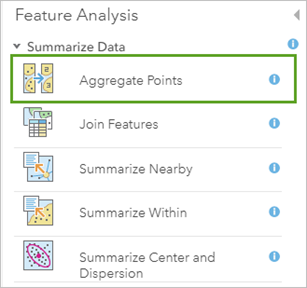


3. **Aggregate Points (ポイントの集約)** ツールで、以下のパラメータが設定されていることを確認します。
  - **Choose layer containing points to aggregate into areas (エリアに集約するポイントを含むレイヤーを選択)** には、**Traffic Collisions** を選択します。
  - **Choose layer containing aggregation areas (集約エリアを含むレイヤーを選択)** では、**Polygon (ポリゴン)** をクリックし、ポリゴン レイヤーを選択で **Pasadena Block Groups** を選択します。   

ここでは以下のパラメータを設定します。
  - **Result layer name (結果レイヤーの名前)** には、*Pasadena_Collisions_Aggregated* と入力し、レイヤー名が一意となるようにイニシャルを追加します。
  - チェックが入っている場合は、**Keep areas with no points (ポイントを含まないエリアを維持)** のチェックを外します。
  - **Use current map extent (現在のマップ表示範囲を使用)** にチェックが入っている場合は、チェックを外します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/b8de262452d6417bbf5239eb3fbe85b7/data" width="300px" />

この場合、**Add statistics (統計情報の追加)** と **Choose field to group by (グループ化の基準にするフィールドを選択)** のパラメータは使用しません。これらは、選択したポリゴンレイヤー内のフィールドの統計情報を計算するためのオプションのパラメータです。**Use current map extent (現在のマップ表示範囲を使用)** は、分析を特定の範囲に限定する方法です。

4. **Run Analysis (分析の実行)** をクリックします。分析の実行に時間がかかる場合があります。完了すると、レイヤーがweb マップに追加されます。

5. **コンテンツ** ペインで、**Traffic Collisions** のチェックを外してオフにします。集約されたレイヤーは、 等級シンボル で表示されます。ブロック グループで交通事故が多いほど、そのブロック グループの円は大きくなります。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/15376d8ad35d427cbcab52da2fef47cd/data" width="600px" />

# ArcGIS Online で解析を実行 - 六角形で集約 <a class="anchor" id="perform-analysis-agol-hexagons"></a>

次に、同じジオプロセシング ツールを実行しますが、ブロック グループごとに集約するのではなく、1kmの六角形ごとに集約します。
ブロック グループは、道路や都市境界線、水域など、文化的・物理的な要因に基づいて描かれています。マップを見ればわかるように、これらのブロックは同じ大きさ、同じ形ではありません。より均一な方法でデータを集計するには、六角形のビンを使用することになります。

1. **コンテンツ** ペインで、**Pasadena Collisions Aggregated** を選択して、**Rerun Analysis (解析の再実行)** をクリックします。 

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/e76f5171266e4463a2d7cdc9366c3d15/data" width="200px" />

**解析** ペインで、最初に設定したパラメータ設定がされた状態で、**Aggregate Points (ポイントの集約)** ツールが表示されます。

2. **Aggregate Points (ポイントの集約)** ツールで、**Choose layer containing aggregation areas (集約エリアを含むレイヤーを選択)** で、**Hexagon (六角形)** をクリックします。 

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/58b7fd4d750d43c19afcbe4eaabf1fac/data" width="300px" />

3. **Select the size for the hexagon bins (六角形ビンのサイズを選択)** で、**1 Kilometers (キロメートル)** を選択します。

4. **Result layer name (結果レイヤーの名前)** には、*Pasadena_Collisions_Hex_Aggregation* と入力し、イニシャルを追加します。 

5. **Run Analysis (分析の実行)** をクリックします。

6. **コンテンツ** ペインで、**Pasadena Collisions Aggregated** レイヤーのチェックを外します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/d5bebf2459dc495a88e6e18c8fad1acd/data" width="600px" />

7. マップを保存します。

六角形の集約では、ほとんどの交通事故が市の西部、高速道路 210号線と 710号線の交差点付近で発生していることがわかります。最後にWeb マップ を保存して閉じます。次に、ArcGIS Notebook で同じ解析を実行します。

# ArcGIS Notebooks で解析を実行 - ブロック グループで集約 <a class="anchor" id="perform-analysis-block-group"></a>

ArcGIS Online で解析を実行したので、同じ **Pasadena Traffic Collisions** および **Pasadena Block Groups** レイヤーを Python を使って解析するために作成した **Pasadena Collisions Aggregated Notebook_イニシャル** のArcGIS Notebook に戻りましょう。

1. ArcGIS Online の **Content** ページで、**Pasadena Collisions Aggregated Notebook_イニシャル** のArcGIS Notebook を探し、開きます。

2. **Cell** メニューをクリックし、**Run All** をクリックして、すべてのセルを再実行します。

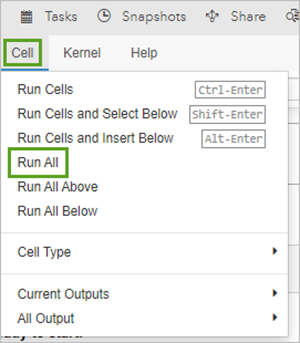

すでに完成しているすべてのセルの最後に、解析を行うためのコードを書き始めることになります。

3. 最後のセルまでスクロールしてクリックし、リボン上の **Analysis (解析)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/dc45791686c34d619e6df29037a51893/data" width="400px" />



4. **Analysis Tools (解析ツール)** ペインで、**Summarize Data (データの集約)** を展開します。**Aggregate Points (ポイントの集約)** で、**Add Code Snippet (コードスニペットの追加)** ボタンをクリックします。 

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/cd16770e4c4347e9a3c108ad10b88891/data" width="300px" />

ArcGIS API for Python から features モジュールをインポートして **aggregate_points (ポイントの集約)** 関数を呼び出す新しいコード ブロックがノートブックに追加されています。コードを実行する前に、aggregate_features 関数に必要なパラメータを確認するための関数シグネチャを確認します。各パラメータは、関数が期待する通りに正確に入力する必要があり、そうしないとエラーが発生します。

In [ ]:
from arcgis import features
features.summarize_data.aggregate_points()

5. 左右の小括弧 **()** を、クエスチョンマーク **?** に置き換えして、セルを実行します。

    これは関数シグネチャを呼び出します。シグネチャは ```aggregate_points``` 関数が入力として使用するすべてのパラメータを表示します。これらのうちのいくつかはオプションであることに注意してください。

In [ ]:
from arcgis import features
features.summarize_data.aggregate_points?

6. 次に、解析を実行するために、関数に適切な入力パラメータを設定します。2行目の ```feature.summarize``` の前に、 ```collisions_by_block_group =``` を追加してください。これは解析処理の結果を格納する新しい変数を定義し、名前を ```collisions_by_block_group``` としています。

7. 括弧の中に、```point_layer = traffic``` を追加してください。これはツールが集約するポイントレイヤーの名前です。

8. 括弧の中に、```polygon_layer = block_groups``` を設定します。これは、traffic ポイントが集約されるフィーチャを設定します。


9. さらに括弧の中に、```output_name = "collisions_by_block_group_YOURINITIALS"``` を設定します。これは、出力されるフィーチャの名前です。

10. 最後に括弧の中に ```keep_boundaries_with_no_points=False``` を設定します。これは、ポイントを含まないエリアを省略するようにツールに指示します。この関数は次のようになります。

In [ ]:
from arcgis import features
collisions_by_block_group = features.summarize_data.aggregate_points(point_layer = traffic,
                                                                     polygon_layer= block_groups, 
                                                                     output_name = "collisions_by_block_group_YOURINITIALS",
                                                                     keep_boundaries_with_no_points=False)

11. セルを実行します。処理の実行には数分かかる場合があります。処理中のセルは大括弧の間にアスタリスクで表示されます。今回、この関数は ```collisions_by_block_group``` という名前の集約されたレイヤーを作成します。

12. 新しいセルで、前のセルの下に ```collisions_by_block_group``` と入力し、セルを実行します。これにより、あなたのArcGIS Online アカウントに解析結果のプレビューが表示されます。

In [ ]:
collisions_by_block_group

集約の解析結果を表示するために、ノートブックに新しいマップを作成します。

13. Pasadena 上に ```traffic_map_1``` という名前の別のマップを作成します。

In [ ]:
traffic_map_1 = gis.map('Pasadena, CA')
traffic_map_1

14. **collisions_by_block_group** をマップに追加します。

In [ ]:
traffic_map_1.add_layer(collisions_by_block_group)

このマップは、前に ArcGIS Online で作成した、ブロック グループで交通事故を集約したマップと同じものを指し示しています。

# ArcGIS Notebooks で解析を実行 - 六角形で集約 <a class="anchor" id="perform-analysis-hexbins"></a>

ArcGIS Online で六角形のビンによる集約する方法について見てきました。次に、ArcGIS Notebooks と ArcGIS API for Python を使用して、六角形のビンによるポイントの集約を行います。ArcGIS Online では六角形のビンによる集約は 1 ステップでしたが、ArcGIS API for Python のバージョン 1.8.2 以前を使用すると 2 ステップで完了します。まず、[Generate Tessellation(テッセレーションの生成)](https://doc.arcgis.com/en/arcgis-online/analyze/generate-tessellations.htm) という解析ツールを使って六角形のレイヤーを生成します。次に、六角形のテッセレーションを、ポイントを集約するためのフィーチャーとして使用します。

1. **Analysis Tools (解析ツール)** ペインで、**Manage Data (データの管理)** を展開します。**Generate Tessellations (テッセレーションの生成)** ツールの横にある **Add Code Snippet (コードスニペットの追加)** ボタンをクリックし、ノートブックに追加します。 これにより、ArcGIS API for Python の features モジュールをノートブックにインポートし、**generate_tessellation()** を呼び出す方法を示す新しいコードブロックが追加されます。セルはまだ実行しないでください。 
Analysis Tools (解析ツール) ペインで、必要に応じて、**Summarize Data (データの集約)** を折りたたみます。

In [ ]:
from arcgis import features
features.manage_data.generate_tessellation()

2. コード セル内で ```hexbins``` という変数を定義し、 ```hexbins = features.manage_data.generate_tessellation()``` を設定します。この ```hexbins``` 変数には、生成した六角形のテッセレーション フィーチャ レイヤー アイテムが格納されます。

3. [**generate_tessellation**](https://developers.arcgis.com/python/api-reference/arcgis.features.manage_data.html?highlight=generate#arcgis.features.manage_data.generate_tessellation) のヘルプドキュメントをご参照ください。このツールで六角形のテッセレーション フィーチャ レイヤーを生成するためには、以下のパラメータを設定する必要があります。 ```extent_layer```, ```bin_size```, ```bin_size_unit```, ```bin_type```, ```output_name```。 

4. ```generate_tessellation()``` 関数の中で、次の入力変数を設定します。
    - ```extent_layer=block_groups```
    - ```bin_size=1```
    - ```bin_size_unit='SquareKilometers'```
    - ```bin_type='HEXAGON'```
    - ```output_name='Pasadena_CA_Hexbins_YOURINITIALS'```, ```YOURINITIALS``` はあなたのイニシャルで置き換えしてください 
    
関数は以下のようになります。

In [ ]:
hexbins = features.manage_data.generate_tessellation(extent_layer=block_groups,
                                                     bin_size=1, 
                                                     bin_size_unit='SquareKilometers', 
                                                     bin_type='HEXAGON',
                                                     output_name='Pasadena_CA_Hexbins_YOURINITIALS')

5. 六角形のビンを生成するために、コード セルを実行します。

6. 新しくコード セルを作成し、```hexbins``` と入力します。

In [ ]:
hexbins

7. セルを実行します。ArcGIS Online のアイテム プレビューが表示されます。```hexbins``` を使用して、交通事故のポイントを集約します。

8. **Analysis Tools (解析ツール)** ペインで、**Summarize Data (データの集約)** を展開します。**Aggregate Points (ポイントの集約)** で、**Add Code Snippet (コードスニペットの追加)** ボタンをクリックします。これにより、ArcGIS API for Python の features モジュールをノートブックにインポートし、**aggregate_points()** を呼び出す方法を示す新しいコードブロックが追加されます。今回は、集約フィーチャとして ```hexbins``` を使用します。

9. ブロック グループによる集約と同様に、 ```feature.summarize``` の前に ```collisions_by_hexbin =``` を記述してください。これは解析処理の結果を格納する新しい変数を、名前を ```collisions_by_hexbin``` として定義しています。


10. 上で行ったように、 ```point_layer```, ```output_name```, ```polygon_layer```, ```keep_boundaries_with_no_points```  の各変数に値を設定します。```polygon_layer``` には ```hexbins``` を使用します。引数 ```output_name``` には、結果の ***collisions_by_1km_hexbin_*** の後に自分のイニシャルを付けて呼び出します。あなたのコードは次のようなコード セルになります。

In [ ]:
collisions_by_hexbin = features.summarize_data.aggregate_points(point_layer=traffic,
                                         output_name='collisions_by_1km_hexbin_YOURINITIALS', 
                                         polygon_layer=hexbins,
                                         keep_boundaries_with_no_points=True)

11. セルを実行します。


12. 処理が完了したら、最終セルの下にセルを作成し、```collisions_by_hexbin``` と入力し、セルを実行します。これにより、あなたのArcGIS Online アカウントに解析結果のプレビューが表示されます。六角形のビンごとにポイントを集約したので、その結果を可視化します。

In [ ]:
collisions_by_hexbin

13. ノートブックの ```collisions_by_hexbin``` の結果の下に、コード セルを作成してください。上記で学んだことを使って、Pasadena 上に新しいマップ名 ```traffic_map_2``` を作成し、```collisions_by_hexbin``` のレイヤーを追加してください。


14. ```traffic_map_1``` と ```traffic_map_2``` をweb マップとして保存するために、マップビューをweb マップとして保存する方法について知っていることを利用しましょう。 

ヘルプが必要な場合は、[Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) のレッスンの **Save the map to ArcGIS Online (ArcGIS Online にマップを保存)** のセクションを参照してください。

15. ノートブックを保存しておけば、後でこの項目に戻り、コードを再実行したり、ノートブックを修正したり、解析を拡張したりすることができます。

# 要約 <a class="anchor" id="summary"></a>

このレッスンでは、ArcGIS Notebooks と ArcGIS API for Python を使用して、一般的な Web GIS ワークフローを Python プログラミング ワークフローに変換する方法を学びました。Web マップにコンテンツを追加し、ArcGIS Online で空間解析を実行した後、ArcGIS Notebooks で同じタスクを完了させました。Python と ArcGIS Notebooks の詳細については、「Learn Python with ArcGIS Notebooks」のレッスンを続けてご覧ください。

# チャレンジ <a class="anchor" id="challenge"></a>

マップを作成し、コンテンツを追加し、分析を実行する方法がわかったので、時間をかけて自分の知識を適用してみましょう。 ここでは、PythonとWeb GISの理解度をテストするための2つのオプションを紹介します。

1. 同じ **Pasadena Traffic Collisions** レイヤーを使って、**Analyze Patterns (パターンの分析)** の１つを使って、 パターン分析を実行します。

2. ArcGIS Online で、**Pasadena Traffic Collisions** と同様のポイント フィーチャ レイヤーと **Pasadena Block Groups** と同様のポリゴン レイヤーの 2 つのレイヤーを見つけて、このノートブックを通じて行ったのと同じ分析を繰り返す。